In [1]:
# imports

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from math import sqrt

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import TweedieRegressor
from sklearn.linear_model import LassoLars

from scipy import stats
from scipy.stats import pearsonr, spearmanr

from sklearn.metrics import mean_squared_error, r2_score, explained_variance_score

from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import PolynomialFeatures

from sklearn.cluster import KMeans

from sklearn.feature_selection import SelectKBest, f_regression, RFE


from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import classification_report, confusion_matrix, plot_confusion_matrix

from sklearn.neighbors import KNeighborsClassifier

# import my functions
import prepare
import env
import prepare_xy_split
import selectKBest_rfe_functions

# turn off pink warning boxes
import warnings
warnings.filterwarnings("ignore")

%matplotlib inline


In [2]:
red = pd.read_csv('winequality-red.csv')
white = pd.read_csv('winequality-white.csv')

In [3]:
red['color'] = 'red'
red.head(2)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,color
0,7.4,0.70,0.0,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red
1,7.8,0.88,0.0,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,red


In [4]:
white['color'] = 'white'
white.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,color
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6,white
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6,white
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6,white
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,white
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,white


In [5]:
# shape of each df

red.shape, white.shape

((1599, 13), (4898, 13))

In [6]:
# number of nulls in each df

print(f'Red nulls \n{red.isna().sum()}')
print()
print(f'White nulls \n{white.isna().sum()}')


Red nulls 
fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
color                   0
dtype: int64

White nulls 
fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
color                   0
dtype: int64


In [7]:
# merging the csv files

# wine = pd.concat(map(pd.read_csv, ['winequality-red.csv', 'winequality-white.csv']), ignore_index=True)


In [8]:
# concatenating the two dfs with the new columns

# wine = [white, red]
# wine = pd.concat(wine)

wine = pd.concat([white, red], ignore_index = True)



In [9]:
# seeing that both colours are added

wine.color.value_counts()

white    4898
red      1599
Name: color, dtype: int64

In [10]:
# informational description

wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         6497 non-null   float64
 1   volatile acidity      6497 non-null   float64
 2   citric acid           6497 non-null   float64
 3   residual sugar        6497 non-null   float64
 4   chlorides             6497 non-null   float64
 5   free sulfur dioxide   6497 non-null   float64
 6   total sulfur dioxide  6497 non-null   float64
 7   density               6497 non-null   float64
 8   pH                    6497 non-null   float64
 9   sulphates             6497 non-null   float64
 10  alcohol               6497 non-null   float64
 11  quality               6497 non-null   int64  
 12  color                 6497 non-null   object 
dtypes: float64(11), int64(1), object(1)
memory usage: 660.0+ KB


In [11]:
# statistical description 

wine.describe().T

,count,mean,std,min,25%,50%,75%,max
fixed acidity,6497.0,7.215307,1.296434,3.80000,6.40000,7.00000,7.70000,15.90000
volatile acidity,6497.0,0.339666,0.164636,0.08000,0.23000,0.29000,0.40000,1.58000
citric acid,6497.0,0.318633,0.145318,0.00000,0.25000,0.31000,0.39000,1.66000
residual sugar,6497.0,5.443235,4.757804,0.60000,1.80000,3.00000,8.10000,65.80000
chlorides,6497.0,0.056034,0.035034,0.00900,0.03800,0.04700,0.06500,0.61100
free sulfur dioxide,6497.0,30.525319,17.749400,1.00000,17.00000,29.00000,41.00000,289.00000
total sulfur dioxide,6497.0,115.744574,56.521855,6.00000,77.00000,118.00000,156.00000,440.00000
density,6497.0,0.994697,0.002999,0.98711,0.99234,0.99489,0.99699,1.03898
pH,6497.0,3.218501,0.160787,2.72000,3.11000,3.21000,3.32000,4.01000
sulphates,6497.0,0.531268,0.148806,0.22000,0.43000,0.51000,0.60000,2.00000


In [12]:
# renaming columns

wine.rename(columns = {'fixed acidity' : 'fixed_acidity', 'volatile acidity' : 'volatile_acidity', 
                       'citric acid' : 'citric_acid', 'residual sugar': 'rs', 'free sulfur dioxide': 'free_s02',
                       'total sulfur dioxide' : 'total_s02'}, inplace = True)

In [13]:
# renamed

wine.head(1)

,fixed_acidity,volatile_acidity,citric_acid,rs,chlorides,free_s02,total_s02,density,pH,sulphates,alcohol,quality,color
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.001,3.0,0.45,8.8,6,white


<AxesSubplot:>

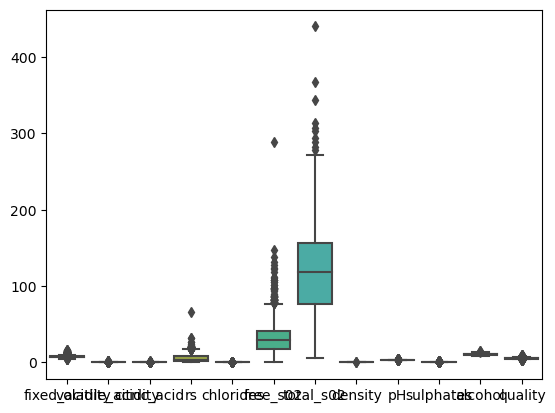

In [14]:
# looking for outliers

sns.boxplot(data = wine)

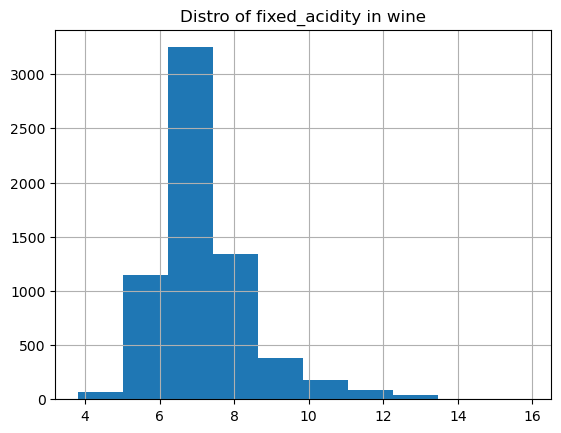

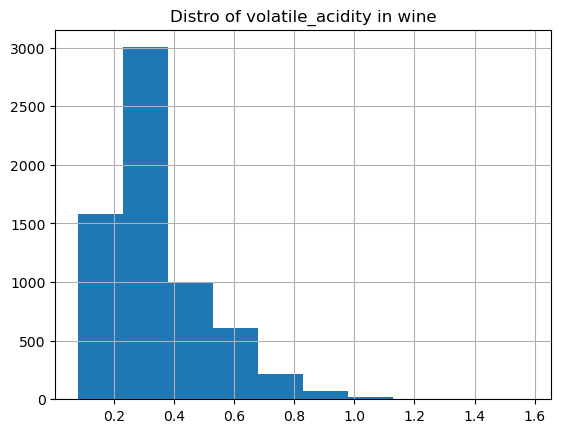

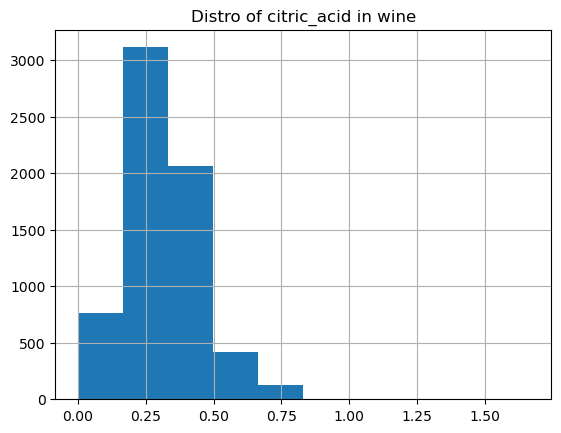

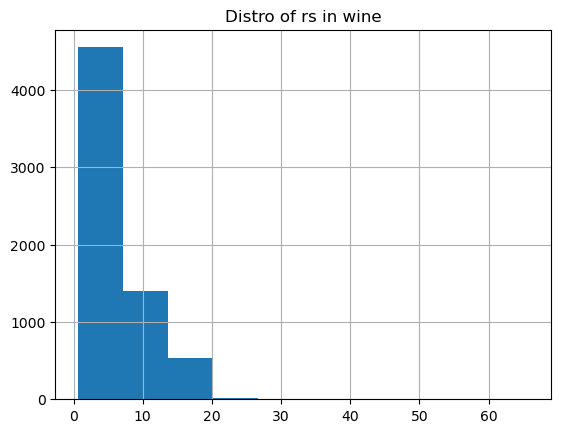

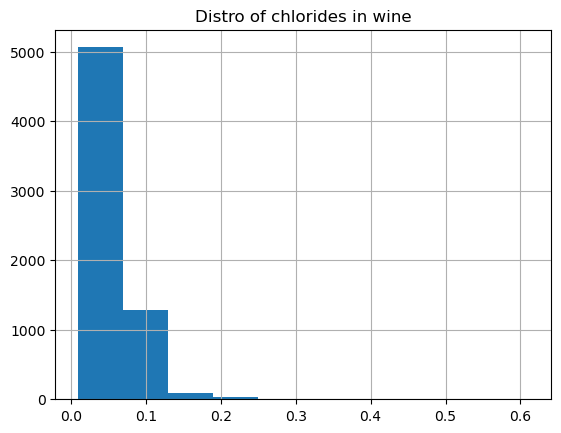

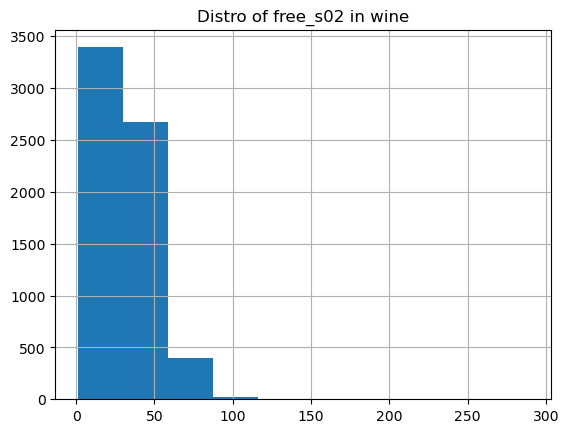

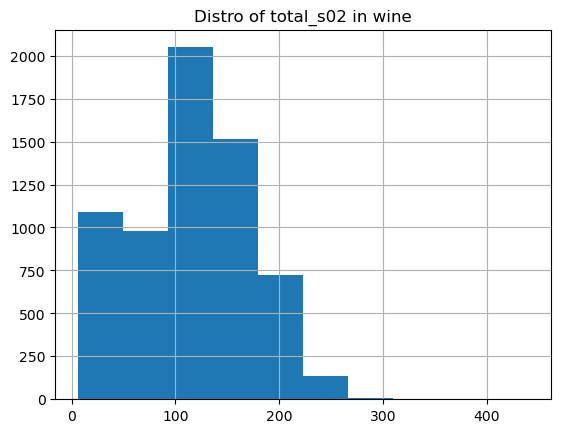

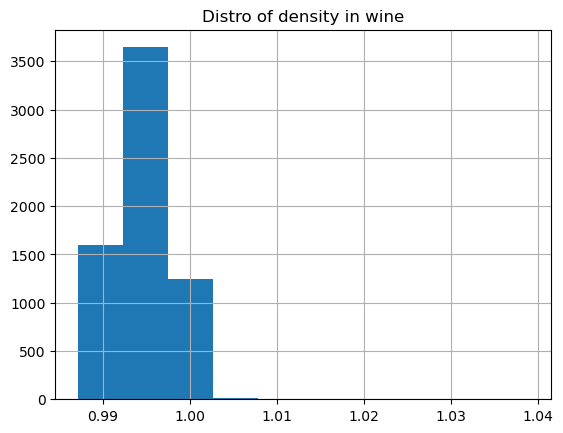

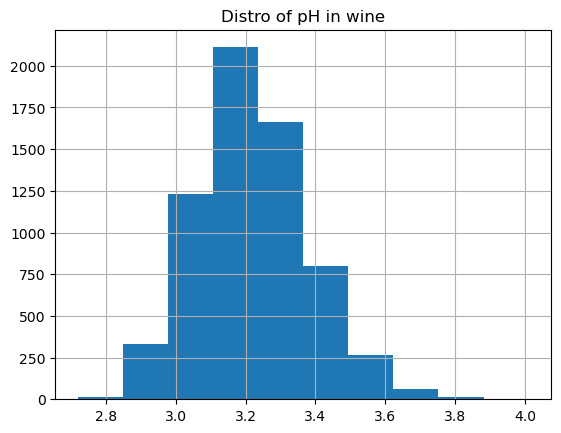

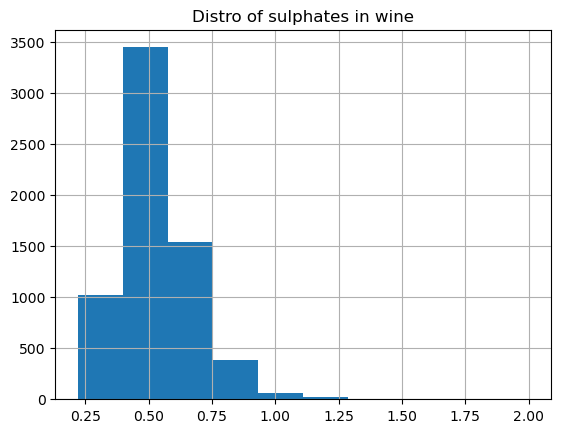

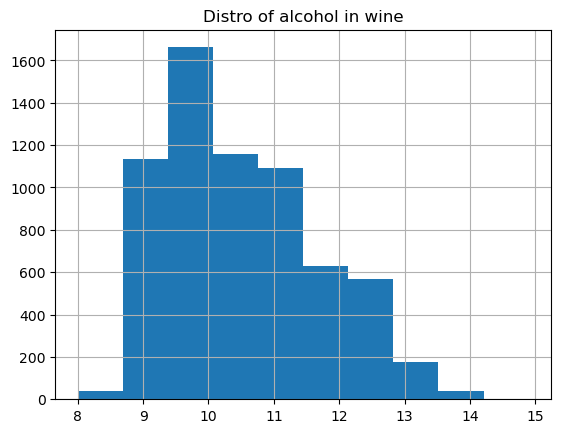

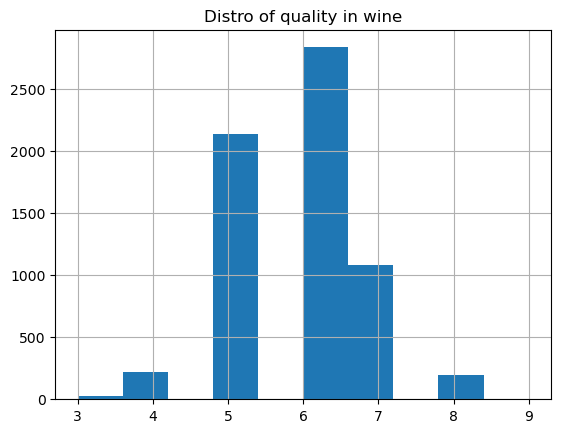

In [15]:
# plotting the numeric columns

num_cols = ['fixed_acidity', 'volatile_acidity', 'citric_acid', 'rs', 'chlorides', 'free_s02', 'total_s02', 'density', 'pH', 'sulphates', 'alcohol', 'quality']

for col in num_cols:
    
    plt.hist(wine[col])
    plt.title(f'Distro of {col} in wine')
    plt.grid()
    plt.show()

In [16]:
def remove_outliers(df, k=2):
    
    '''
    This function is to remove the top 25% and bottom 25% of the data for each column.
    This removes the top and bottom 50% for every column to ensure all outliers are gone.
    '''
    
    a = []
    b = []
    fences = [a, b]
    
    features = []
    col_list = []
    
    i = 0
    
    for col in df:
            new_df = np.where(df[col].nunique() > 8, True, False)
            if new_df == True:
                
                if df[col].dtype == 'float' or df[col].dtype == 'int':
                    '''
                    for each feature find the first and third quartile
                    '''
                    q1, q3 = df[col].quantile([.25, .75])
                    '''
                    calculate inter quartile range
                    '''
                    iqr = q3 - q1
                    '''
                    calculate the upper and lower fence
                    '''
                    upper_fence = q3 + (k * iqr)
                    lower_fence = q1 - (k * iqr)
                    '''
                    appending the upper and lower fences to lists
                    '''
                    a.append(upper_fence)
                    b.append(lower_fence)
                    '''
                    appending the feature names to a list
                    '''
                    features.append(col)
                    '''
                    assigning the fences and feature names to a dataframe
                    '''
                    var_fences = pd.DataFrame(fences, columns = features, 
                                              index = ['upper_fence', 'lower_fence'])
                    col_list.append(col)
                    
                else:
                    print(col)
                    print('column is not a float or int')
                    
            else:
                print(f'{col} column ignored')
                
    '''
    for loop used to remove the data deemed unecessary
    '''
    for col in col_list:
        
        df = df[(df[col] <= a[i]) & (df[col] >= b[i])]
        i += 1
        
    return df, var_fences
     

In [17]:
# calling the function 

wine, var_fences = remove_outliers(wine)

quality column ignored
color column ignored


In [18]:
wine.quality.value_counts()

6    2533
5    1851
7    1004
8     179
4     172
3      13
9       5
Name: quality, dtype: int64

In [19]:
wine.describe().T

,count,mean,std,min,25%,50%,75%,max
fixed_acidity,5757.0,7.034176,0.974296,3.90000,6.40000,6.90000,7.50000,10.3000
volatile_acidity,5757.0,0.319750,0.137262,0.08000,0.22000,0.28000,0.38000,0.7400
citric_acid,5757.0,0.307355,0.122002,0.00000,0.25000,0.31000,0.38000,0.6700
rs,5757.0,5.591906,4.715453,0.60000,1.80000,3.40000,8.40000,20.7000
chlorides,5757.0,0.050010,0.018637,0.00900,0.03700,0.04600,0.05700,0.1190
free_s02,5757.0,31.125413,16.437084,1.00000,18.00000,29.00000,42.00000,89.0000
total_s02,5757.0,119.781136,53.638754,6.00000,87.00000,121.00000,157.00000,303.0000
density,5757.0,0.994420,0.002858,0.98711,0.99205,0.99456,0.99666,1.0026
pH,5757.0,3.218933,0.155408,2.72000,3.11000,3.21000,3.32000,3.7200
sulphates,5757.0,0.514530,0.123028,0.22000,0.42000,0.50000,0.59000,0.9400


In [20]:
#Removing the very few super high quality wines and very few super low quality wines

wine = wine[wine.quality != 9]

wine = wine[wine.quality != 3]

In [21]:
#After removing the high and low qualities we only removed 18 lines(13 low, 5 high) from the dataset
wine.shape

(5739, 13)

# Our wine quality categories now range from 4 to 8

In [22]:
wine.quality.value_counts()

6    2533
5    1851
7    1004
8     179
4     172
Name: quality, dtype: int64

### Splitting the data into train, validate, test

In [23]:
# creating dummy column for colour

dummies = pd.get_dummies(wine[['color']], drop_first = True)


In [24]:
# concatenating dummies to the wine dataframe

wine = pd.concat([wine, dummies], axis = 1)

In [25]:
# visualising with the dummy colomn

wine.sample(3)

,fixed_acidity,volatile_acidity,citric_acid,rs,chlorides,free_s02,total_s02,density,pH,sulphates,alcohol,quality,color,color_white
4132,7.4,0.31,0.26,8.6,0.048,47.0,206.0,0.9964,3.26,0.36,9.1,5,white,1
5204,7.6,0.62,0.32,2.2,0.082,7.0,54.0,0.9966,3.36,0.52,9.4,5,red,0
2161,6.8,0.37,0.28,4.0,0.030,29.0,79.0,0.9900,3.23,0.46,12.4,7,white,1


In [26]:
# splitting

train, val, test = prepare.train_val_test(wine)
train.shape, val.shape, test.shape

((4017, 14), (1033, 14), (689, 14))

# Clustering 

In [27]:
train.sample(3)

,fixed_acidity,volatile_acidity,citric_acid,rs,chlorides,free_s02,total_s02,density,pH,sulphates,alcohol,quality,color,color_white
5220,7.8,0.62,0.05,2.3,0.079,6.0,18.0,0.99735,3.29,0.63,9.3,5,red,0
1029,6.3,0.60,0.44,11.0,0.050,50.0,245.0,0.99720,3.19,0.57,9.3,4,white,1
3453,5.6,0.34,0.30,6.9,0.038,23.0,89.0,0.99266,3.25,0.49,11.1,6,white,1


## Clustering With K Means

### Question 1 : Is overall quality of a given wine related to its free sulphur dioxide, total sulphur dioxide & sulphate levels ?

### Scaling the data

In [28]:
# first, making a copy

train_scaled = train.copy()

In [29]:
# scaling the data

mm_scaler = MinMaxScaler()

train_scaled[['fixed_acidity', 'volatile_acidity', 
       'citric_acid', 'rs', 'chlorides', 
       'free_s02', 'total_s02', 'density',
       'pH', 'sulphates', 'alcohol', 
       'quality']] = mm_scaler.fit_transform(train_scaled[['fixed_acidity', 'volatile_acidity',
                                                'citric_acid', 'rs', 'chlorides', 
                                                'free_s02', 'total_s02', 'density', 
                                                'pH', 'sulphates', 'alcohol', 'quality']])
train_scaled.sample(3)

,fixed_acidity,volatile_acidity,citric_acid,rs,chlorides,free_s02,total_s02,density,pH,sulphates,alcohol,quality,color,color_white
3251,0.437500,0.242424,0.552239,0.530,0.309091,0.715909,0.562290,0.620202,0.346939,0.422535,0.306452,0.50,white,1
6316,0.609375,0.681818,0.014925,0.045,0.618182,0.022727,0.043771,0.531313,0.428571,0.323944,0.290323,0.25,red,0
2237,0.390625,0.393939,0.298507,0.710,0.463636,0.409091,0.525253,0.753535,0.397959,0.309859,0.161290,0.00,white,1


In [30]:
# setting X for question 1 features : sulphur dioxide, total sulphur dioxide & sulphate levels

X_s02 = train_scaled[['free_s02','total_s02', 'sulphates']]

In [31]:
# creating & setting KMeans to scaled data

kmeans = KMeans(n_clusters = 3, random_state = 23)

# fitting to X variable
kmeans.fit(X_s02)

# predicting to X variable
kmeans.predict(X_s02)

array([0, 2, 0, ..., 1, 1, 2], dtype=int32)

In [32]:
# fitting KMeans scaler to the scaled train dataset

kmeans_scaled_s02 = KMeans(n_clusters = 3, random_state = 23)
kmeans_scaled_s02.fit(train_scaled[['free_s02','total_s02', 'sulphates']])

KMeans(n_clusters=3, random_state=23)

In [33]:
# looking at the predicted array

kmeans_scaled_s02.predict(train_scaled[['free_s02','total_s02', 'sulphates']])

array([0, 2, 0, ..., 1, 1, 2], dtype=int32)

In [34]:
# adding new column to train df with scaled data

train_scaled['scaled_clusters'] = kmeans_scaled_s02.predict(train_scaled[['free_s02','total_s02', 'sulphates']])

In [35]:
# finding the inertia drop

kmeans_scaled_s02.inertia_

166.40240058364617

In [36]:
# inertia loop

inertia = []
seed = 23

for i in range (1, 7):
    
    # clustering increments
    kmeans = KMeans(n_clusters = i, random_state = seed)
    
    kmeans.fit(train_scaled[['free_s02','total_s02', 'sulphates']])
    
    # append the inertia
    inertia.append(kmeans.inertia_)
    
inertia

[389.59742578277917,
 232.86132235658644,
 166.40240058364617,
 138.84771273204552,
 119.45995488821838,
 107.19046117405853]

In [37]:
# creating a df for the s02 features

inertia_s02_df = pd.DataFrame({'n_clusters' : list(range(1,7)),
                               'inertia' : inertia})
inertia_s02_df

,n_clusters,inertia
0,1,389.597426
1,2,232.861322
2,3,166.402401
3,4,138.847713
4,5,119.459955
5,6,107.190461


In [38]:
train_scaled.head(1)

,fixed_acidity,volatile_acidity,citric_acid,rs,chlorides,free_s02,total_s02,density,pH,sulphates,alcohol,quality,color,color_white,scaled_clusters
496,0.515625,0.484848,0.925373,0.505,0.290909,0.784091,0.616162,0.706397,0.346939,0.366197,0.096774,0.0,white,1,0


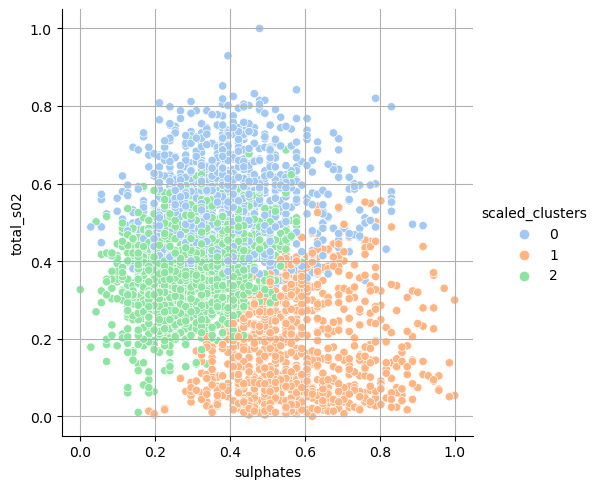

In [39]:
# plotting for 3 features, sulphates & total S_02 against the clusters

sns.relplot(data = train_scaled, x = 'sulphates', y = 'total_s02', hue = 'scaled_clusters', palette = 'pastel')

plt.grid()
plt.show()

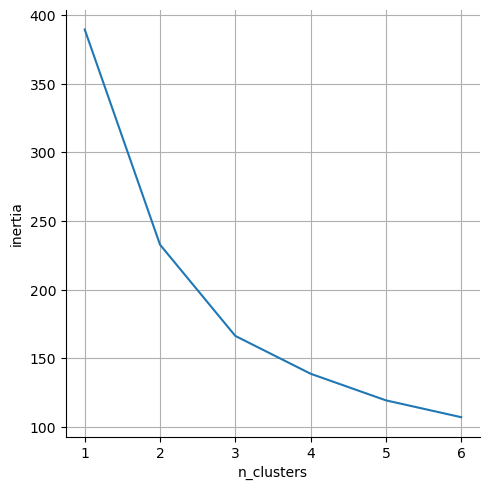

In [40]:
# elbow of the better number of k

sns.relplot(data = inertia_s02_df, x = 'n_clusters', y = 'inertia', kind = 'line')
plt.grid()
plt.show()

**Takeaway : It appears that 2 is the best number of clusters.**

## Question 2 : Do the levels of citric acid and residual sugar in a wine have a relationship to its quality ?

In [41]:
# setting X for question 2 features :  citric acid & residual sugar

X_cit_rs = train_scaled[['citric_acid', 'rs']]

In [42]:
# creating & setting KMeans to scaled data

kmeans = KMeans(n_clusters = 2, random_state = 23)

# fitting to X variable
kmeans.fit(X_cit_rs)


KMeans(n_clusters=2, random_state=23)

In [43]:
# fitting KMeans scaler to the scaled train dataset

kmeans_scaled_crs = KMeans(n_clusters = 4, random_state = 23)
kmeans_scaled_crs.fit(X_cit_rs)


KMeans(n_clusters=4, random_state=23)

In [44]:
# looking at the predicted array

kmeans_scaled_crs.predict(X_cit_rs)

array([0, 2, 0, ..., 1, 1, 3], dtype=int32)

In [45]:
# adding new column to train df with scaled data

train_scaled['scaled_clusters_cit_rs'] = kmeans_scaled_crs.predict(X_cit_rs)

In [46]:
# finding the inertia drop

kmeans_scaled_crs.inertia_

94.60138676451155

In [47]:
# inertia loop for citric acid & residual sugar

inertia = []
seed = 23

for i in range (1, 7):
    
    # clustering increments
    kmeans = KMeans(n_clusters = i, random_state = seed)
    
    kmeans.fit(X_cit_rs)
    
    # append the inertia
    inertia.append(kmeans.inertia_)
    
inertia

[355.8816644780194,
 182.11018876161796,
 124.53575917065594,
 94.60138676451155,
 72.24408139368245,
 56.127338194420616]

In [48]:
# creating a df for the s02 features

inertia_crs_df = pd.DataFrame({'n_clusters' : list(range(1,7)),
                               'inertia' : inertia})
inertia_crs_df

,n_clusters,inertia
0,1,355.881664
1,2,182.110189
2,3,124.535759
3,4,94.601387
4,5,72.244081
5,6,56.127338


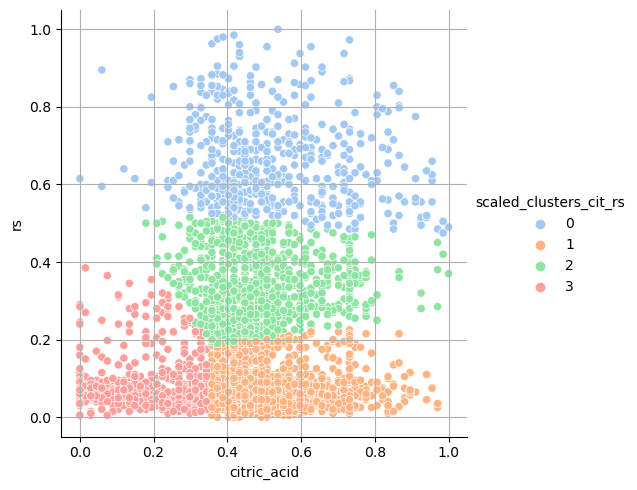

In [49]:
# plotting for 3 features, sulphates & total S_02 against the clusters

sns.relplot(data = train_scaled, x = 'citric_acid', y = 'rs', hue = 'scaled_clusters_cit_rs', palette = 'pastel')

plt.grid()
plt.show()

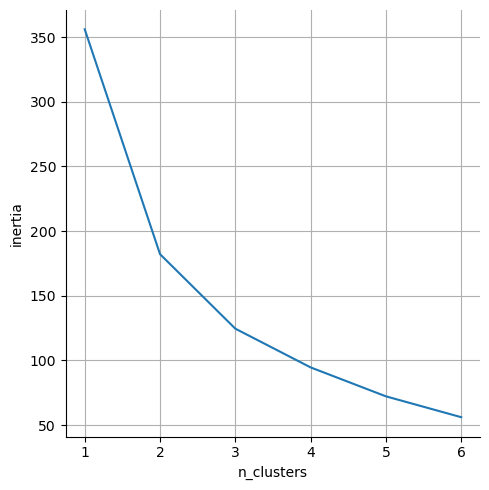

In [50]:
# elbow of the better number of k

sns.relplot(data = inertia_crs_df, x = 'n_clusters', y = 'inertia', kind = 'line')
plt.grid()
plt.show()

**Takeaway : It appears that 2 is the best number of clusters.**


## Question 3, Using K-Nearest Neighbor : Does the pH level of the wine have a relationship to its overall quality ?

In [51]:
# dropping 'color' column to allow for modelling

train.drop(columns = 'color', inplace = True)

val.drop(columns = 'color', inplace = True)

In [52]:
# splitting train, val, test into X and y

X_train, y_train, X_val, y_val, X_test, y_test = prepare_xy_split.tts_xy(train, val, test, 'quality')

X_train.sample(3)

,fixed_acidity,volatile_acidity,citric_acid,rs,chlorides,free_s02,total_s02,density,pH,sulphates,alcohol,color_white
3888,6.0,0.28,0.24,17.8,0.047,42.0,111.0,0.99896,3.10,0.45,8.9,1
1378,6.9,0.28,0.30,1.6,0.047,46.0,132.0,0.99180,3.35,0.38,11.1,1
451,6.1,0.20,0.25,1.2,0.038,34.0,128.0,0.99210,3.24,0.44,10.1,1


### Baseline for the Decision Tree model

In [53]:
# transforming y_train, y_val into DFs to allow for modelling

y_train = pd.DataFrame(y_train)
y_val = pd.DataFrame(y_val)

# assuring that it worked
y_train.head(1)

,quality
496,4


In [54]:
# finding the median of y_train & y_val

quality_pred_median = round(y_train['quality'].median())

# adding the predicted median column onto the y_ DFs

y_train['quality_pred_median'] = quality_pred_median
y_val['quality_pred_median'] = quality_pred_median

y_train.head(1)


,quality,quality_pred_median
496,4,6


In [55]:
# finding the mean of y_train & y_val

quality_pred_mean = round(y_train['quality'].mean())

# adding the predicted mean column onto the y_ DFs
y_train['quality_pred_mean'] = quality_pred_mean
y_val['quality_pred_mean'] = quality_pred_mean

y_train.head(1)

,quality,quality_pred_median,quality_pred_mean
496,4,6,6


In [56]:
# Compute the RMSE comparing actual quality to quality_pred_mean.

rmse_train_mean = mean_squared_error(y_train['quality'], y_train['quality_pred_mean']) ** 0.5

rmse_val_mean = mean_squared_error(y_val['quality'], y_val['quality_pred_mean']) ** 0.5


print(f'The RMSE of the train dataset on the mean is {round(rmse_train_mean)}.')
print(f'The RMSE of the validate dataset on the mean is {round(rmse_val_mean)}.')

The RMSE of the train dataset on the mean is 1.
The RMSE of the validate dataset on the mean is 1.


In [57]:
# Compute the RMSE comparing actual quality to quality_pred_median.

rmse_train_med = mean_squared_error(y_val['quality'], y_val['quality_pred_median']) ** 0.5

rmse_val_med = mean_squared_error(y_val['quality'], y_val['quality_pred_median']) ** 0.5


print(f'The RMSE of the train dataset on the median is {round(rmse_train_med)}.')
print(f'The RMSE of the validate dataset on the median is {round(rmse_val_med)}.')

The RMSE of the train dataset on the median is 1.
The RMSE of the validate dataset on the median is 1.


**Takeaway : The RMSE of the train and validate datasets on both the mean and on the median is 1.**

In [58]:
# setting the baseline to equal 'rmse_train_mean'

y_train['baseline'] = round(rmse_train_mean)

# dropping columns that are no longer necessary 
y_train = y_train.drop(columns = ['quality_pred_median', 'quality_pred_mean'])

In [59]:
# initialise the Decision Tree Classifier = clf

seed = 23

clf5 = DecisionTreeClassifier(max_depth = 5, random_state = seed)

In [60]:
### fitting the model : 

clf5 = clf5.fit(X_train, y_train)

In [61]:
# Examining accuracy of Decision Tree Classifier model

# allows for discrete with continuous 
from sklearn.multioutput import MultiOutputClassifier

clf5 = MultiOutputClassifier(clf5, n_jobs = -1)
clf5.fit(X_train, y_train)

MultiOutputClassifier(estimator=DecisionTreeClassifier(max_depth=5,
                                                       random_state=23),
                      n_jobs=-1)

In [62]:
clf5.score(X_train, y_train)

0.5872541697784416

**The accuracy of the Decision Tree Classifier with 5 branches is about 58.72pc.**

In [63]:
# predictions for quality are on the X_train ; true values are on y_train
# variable to be used for classification report

y_train_predictions5 = clf5.predict(X_train)


In [66]:
## print the classification report :

print(f'Classification Report For Training Dataset \n  \n {classification_report(y_train, y_train_predictions5)}')


ValueError: multiclass-multioutput is not supported